Exercise 1: Multi-Layered Scatter Plot with Marginal Histograms
Objective:

Create a multi-layered scatter plot using plotnine that includes marginal histograms to visualize the distribution of two continuous variables.

Instructions
Choose a dataset with at least two continuous variables (e.g., the Iris dataset).
Load your dataset into a pandas DataFrame.
Import the necessary components from plotnine.
Create a scatter plot mapping the two continuous variables to the x and y axes.
Overlay this plot with marginal histograms along both the x and y axes to show the distribution of each variable.
Customize the plot with titles, labels, and a color scheme that enhances data interpretation.
Display the plot.
Expected Learning Outcome:

Develop skills in creating advanced, multi-layered visualizations that combine scatter plots with histograms using plotnine.

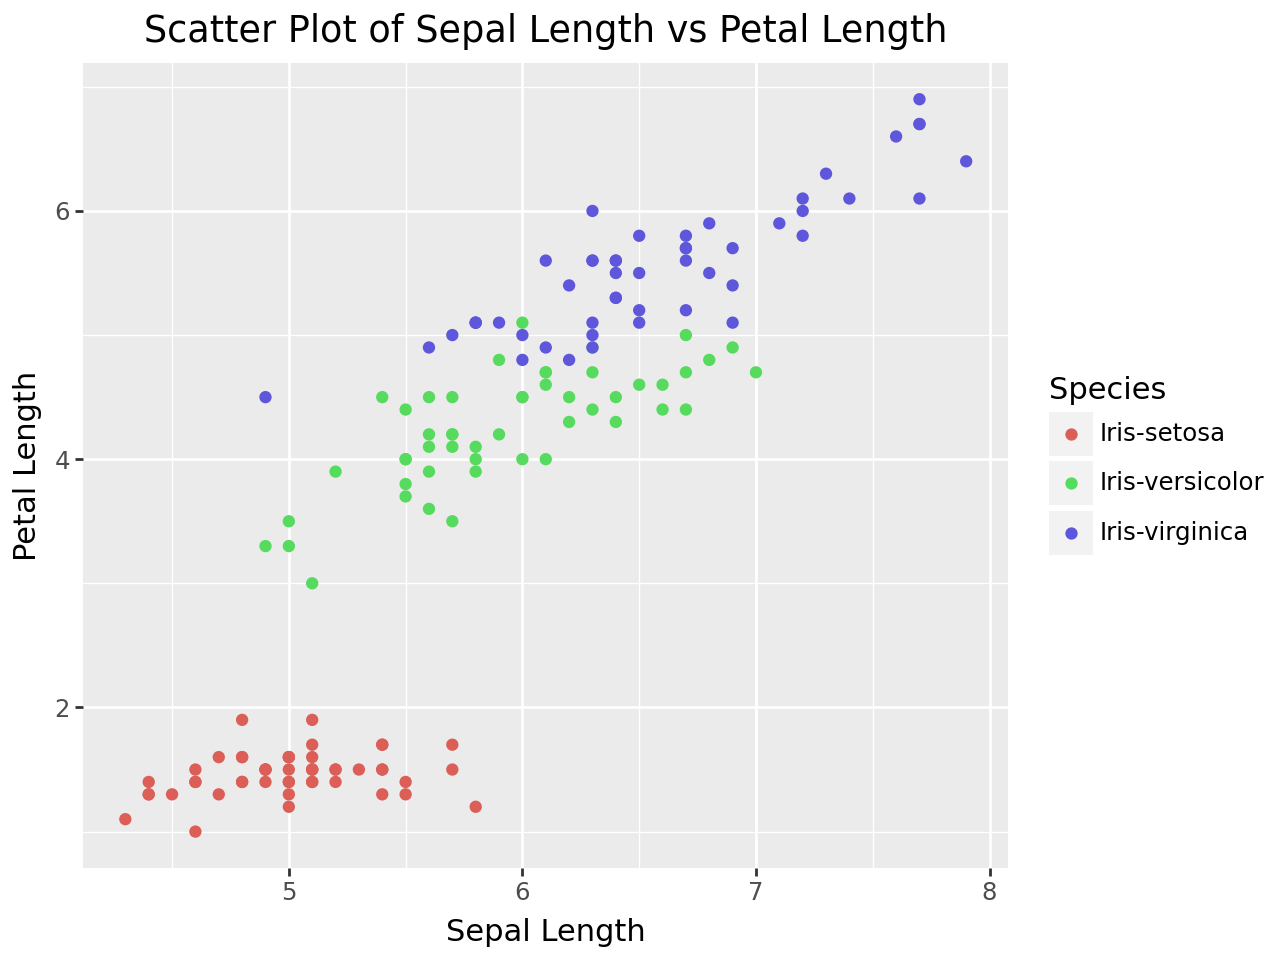

In [9]:
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
import seaborn as sns

iris_data = pd.read_csv("iris.csv")

from plotnine import ggplot, aes, geom_point, labs, theme_minimal

scatter_plot = (
    ggplot(iris_data, aes(x='sepal_length', y='petal_length', color='species')) +
    geom_point() +
    labs(
        title='Scatter Plot of Sepal Length vs Petal Length',
        x='Sepal Length',
        y='Petal Length',
        color='Species'
    )
)
scatter_plot



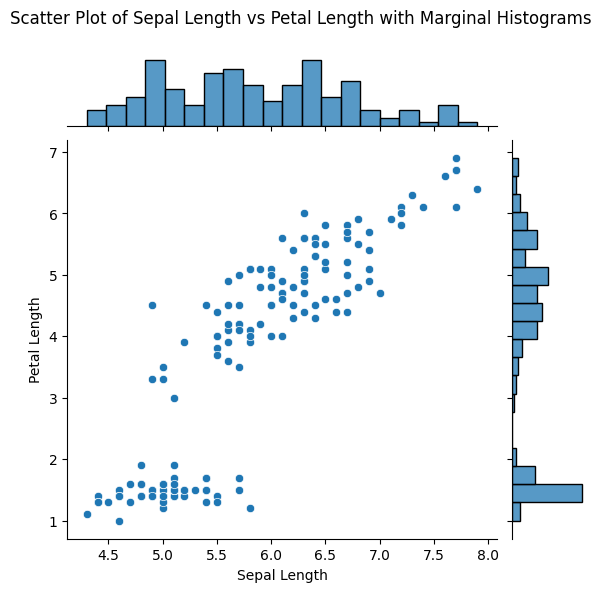

In [8]:
iris_data1 = sns.load_dataset('iris')
joint_plot = sns.jointplot(x='sepal_length', y='petal_length'
        , data=iris_data1, kind='scatter',
        marginal_kws=dict(bins=20, fill=True))

joint_plot.fig.suptitle('Scatter Plot of Sepal Length vs Petal Length with Marginal Histograms')
joint_plot.set_axis_labels('Sepal Length', 'Petal Length')

# Adjust the title position
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

Exercise 2: Interactive Facet Grid with Conditional Elements
Objective:

Use plotnine to create an interactive facet grid that displays different types of plots (scatter plot, line plot, etc.) based on a categorical variable in the dataset.

Instructions
Select a dataset with both categorical and continuous variables.
Load the dataset into a pandas DataFrame.
Import plotnine and other necessary libraries.
Create a facet grid that segments your data by the categorical variable.
Within each facet, implement a conditional statement that chooses the type of plot (scatter, line, etc.) based on the specific subset of data.
Ensure interactivity, such as tooltips or hover information, where applicable.
Customize the plot with appropriate titles, axis labels, and a legend.
Expected Learning Outcome:

Gain experience in creating complex, conditional visualizations using facet grids in plotnine.

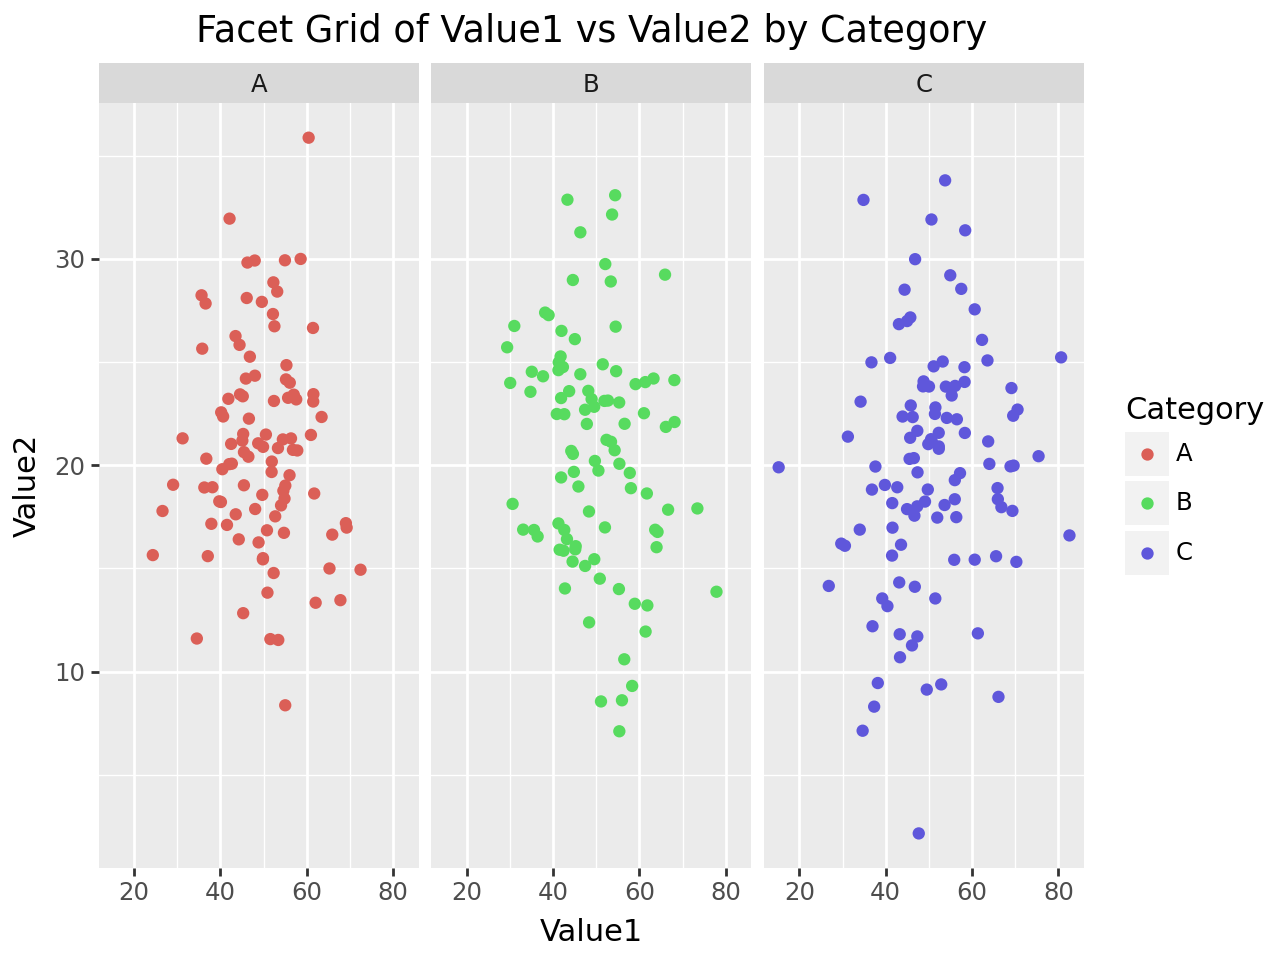

In [14]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_histogram, facet_wrap, labs, theme_minimal

# Create a sample dataset
np.random.seed(42)
data = {
    'Category': np.random.choice(['A', 'B', 'C'], size=300),
    'Value1': np.random.randn(300) * 10 + 50,
    'Value2': np.random.randn(300) * 5 + 20
}
df = pd.DataFrame(data)

# Create a facet grid with different types of plots based on the 'Category' variable
facet_grid = (
    ggplot(df, aes(x='Value1', y='Value2')) +
    geom_point(aes(color='Category')) +
    facet_wrap('~Category') +
    labs(
        title='Facet Grid of Value1 vs Value2 by Category',
        x='Value1',
        y='Value2',
        color='Category'
    )
)

facet_grid

Exercise 3: Time Series Analysis with Rolling Averages and Confidence Intervals
Objective:

Perform a time series analysis on a dataset using plotnine by plotting rolling averages along with confidence intervals.

Instructions
Choose a time series dataset (e.g., stock market data, temperature over time).
Load the dataset into a pandas DataFrame.
Calculate the rolling average and confidence intervals for a chosen time period.
Import plotnine and other necessary libraries.
Plot the time series data along with the rolling averages.
Add shaded areas to represent confidence intervals around the rolling averages.
Customize your plot with titles, labels, and an intuitive color scheme.
Expected Learning Outcome:

Learn to perform advanced time series analysis and visualization, incorporating statistical measures like rolling averages and confidence intervals.

In [16]:
import pandas as pd
import numpy as np
import plotnine as p9
import matplotlib.pyplot as plt

spy_data = pd.read_csv('SPY.csv')
spy_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Volume      2516 non-null   int64  
 3   Open        2516 non-null   float64
 4   High        2516 non-null   float64
 5   Low         2516 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\geoms\geom_path.py:99: PlotnineWarning:

geom_path: Removed 199 rows containing missing values.



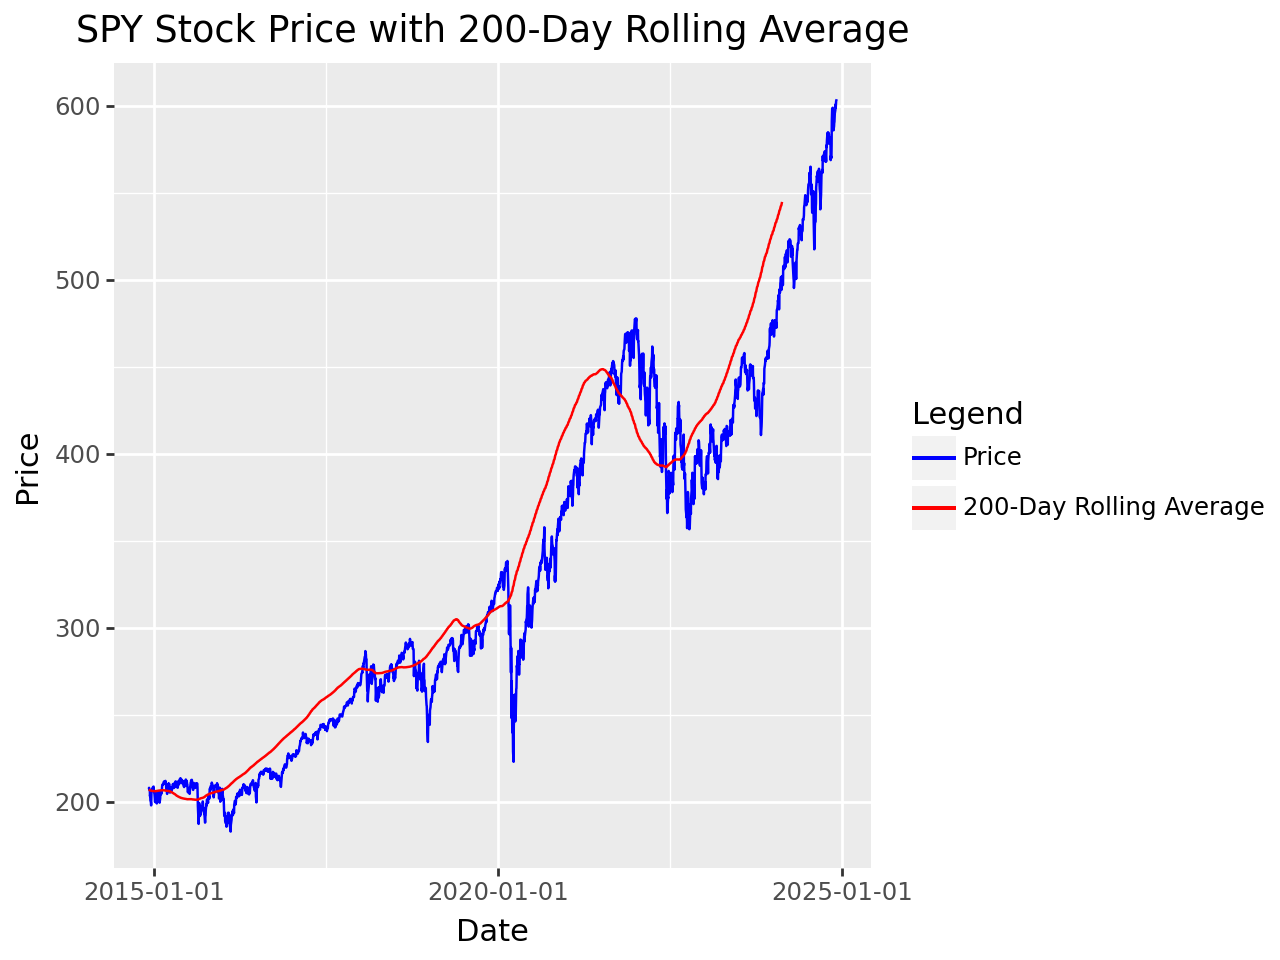

In [25]:
import pandas as pd
import plotnine as p9

spy_data = pd.read_csv('SPY.csv', parse_dates=['Date'])

spy_data.rename(columns={'Close/Last': 'Close'}, inplace=True)

spy_data['200_Day_Rolling_Avg'] = spy_data['Close'].rolling(window=200).mean()

spy_plot = (
    p9.ggplot(spy_data, p9.aes(x='Date')) +
    p9.geom_line(p9.aes(y='Close', color='"Price"')) +
    p9.geom_line(p9.aes(y='200_Day_Rolling_Avg', color='"200-Day Rolling Average"')) +
    p9.labs(
        title='SPY Stock Price with 200-Day Rolling Average',
        x='Date',
        y='Price',
        color='Legend'
    ) +
    p9.scale_color_manual(values=['blue', 'red'])
)

spy_plot